In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load datasets
s1, r1 = 1711, 63
path1 = f'../data/result/{s1}_{r1}/'
X1 = np.load(path1+'resultX.npy')

s2, r2 = 962, 153
path2 = f'../data/result/{s2}_{r2}/'
X2 = np.load(path2+'resultX.npy')

# print(X1.shape)
X1 = X1.reshape(X1.shape[0], s1+r1, 2)
X2 = X2.reshape(X2.shape[0], s2+r2, 2)
# print(X1.shape)

species = np.load(path1+'species.npy', allow_pickle=True)
region = np.load(path2+'region.npy', allow_pickle=True)

img_path = '../../latex/figures/'


In [4]:
t = 0
Xspecies = X1[:,:s1]
Xregion = X2[:, s2:]
print(Xspecies.shape)
print(Xregion.shape)

# Get the species out 

(17, 1711, 2)
(17, 153, 2)


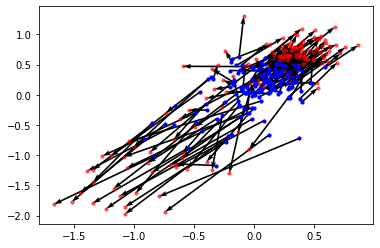

In [64]:
# Plot first and last timestep and arrow for movement
fig, ax = plt.subplots()

to_plot = Xregion
# to_plot = Xspecies

first = to_plot[0]
x1, y1 = first[:,0], first[:,1]
last = to_plot[-1]
x2, y2 = last[:,0], last[:,1]


AB = ax.scatter(x1, y1, c = 'blue', marker = 'o', s = 10, zorder = 3)
CD = ax.scatter(x2, y2, c = 'red', marker = 'o', s = 10, alpha=0.6, zorder = 2)

ax.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1)
# plt.savefig(f'../../latex/figures/latentspace_afew_region', dpi=600)
plt.show()



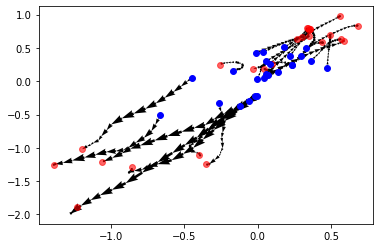

In [70]:
# Plot only a few nodes and whole trajectories
fig, ax = plt.subplots()
idx = np.random.randint(low=0, high=to_plot.shape[1], size=(25))
afew = to_plot[:, idx]


for t in range(0, afew.shape[0]):
    first = afew[t]
    x1, y1 = first[:,0], first[:,1]
    
    if t == 0:
        AB = ax.scatter(x1, y1, c = 'blue', marker = 'o', s = 35, zorder = 3)
    if t == afew.shape[0]-1:
        CD = ax.scatter(x1, y1, c = 'red', marker = 'o', s = 35, alpha=0.6, zorder = 2)
    else:
        last = afew[t+1]
        x2, y2 = last[:,0], last[:,1]

        ax.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1)

# plt.savefig(f'../../latex/figures/latentspace_afew_region', dpi=600)

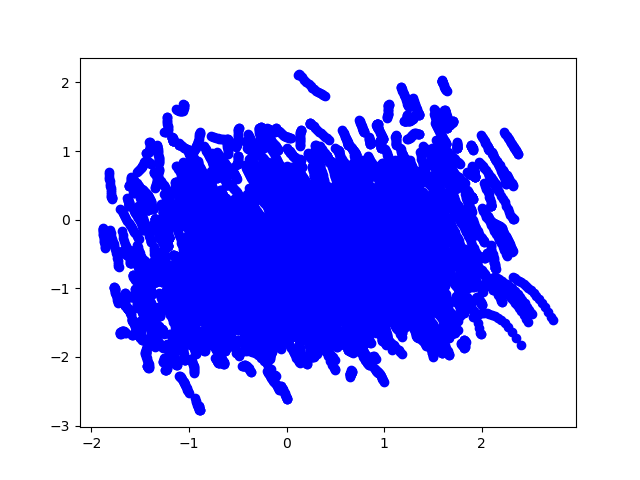

In [5]:
# Make a movie out of this
import matplotlib.animation as animation
%matplotlib widget

fig = plt.figure()

to_plot = Xspecies
imgs = []
for t in range(len(to_plot)):
    Xs_curr = Xspecies[t]
    # Xr_curr = Xregion[t]
    # fig = plt.figure() # if want to save plots
    
    im1 = plt.scatter(Xs_curr[:,0], Xs_curr[:, 1], c='blue')
    # im2 = plt.scatter(Xr_curr[:,0], Xr_curr[:, 1], c='red')
    
    # if t in [0, 5, 10, 15]:
    #     print('save image')
    #     plt.savefig(f'../../latex/figures/latentspace_species_tf{t}')
    imgs.append([im1])

ani = animation.ArtistAnimation(fig, imgs, interval=500, blit=True,
                                repeat_delay=1000)
# ani.save(img_path+'dynamic_evolution.mp4')

plt.show()

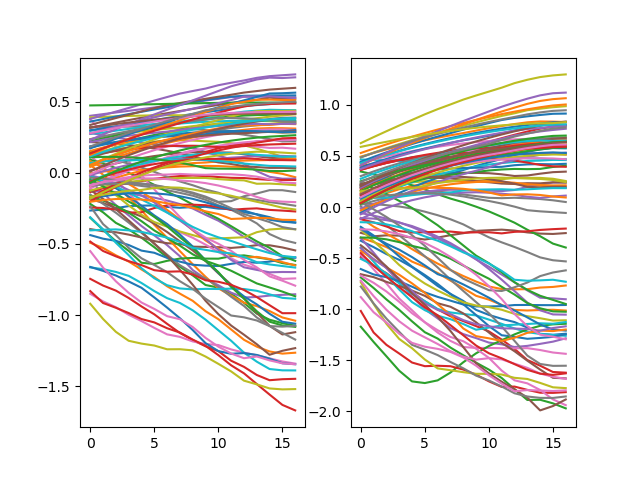

In [6]:
# Plot trajectories
# Xspecies[:,0,:]
to_plot = Xregion
fig = plt.figure()
plt.subplot(121)  
_ = plt.plot(to_plot[:, 1:100, 0])
plt.subplot(122)  # 1 row, 2 columns, Plot 2
_ = plt.plot(to_plot[:, 1:100, 1])

# plt.savefig(f'../../latex/figures/trajectories_region')

In [7]:
# Reshape into trajectories
trajS = Xspecies.transpose(1, 0, 2).reshape(Xspecies.shape[1], Xspecies.shape[0]*Xspecies.shape[2])
trajR = Xregion.transpose(1, 0, 2).reshape(Xregion.shape[1], Xregion.shape[0]*Xregion.shape[2])


In [51]:
from sklearn.cluster import OPTICS, DBSCAN, cluster_optics_dbscan

clust = OPTICS(min_samples=5)
# clust = DBSCAN(eps= 0.3, min_samples=5)
clust.fit(trajS)

OPTICS()

In [52]:
clust.labels_

array([-1, 39, 58, ..., -1, -1, -1])

(array([36., 35., 32., 22., 17., 36., 33., 17., 31., 20., 22., 37., 35.,
        20., 25., 26., 27., 36., 16., 22.]),
 array([ 0.  ,  3.35,  6.7 , 10.05, 13.4 , 16.75, 20.1 , 23.45, 26.8 ,
        30.15, 33.5 , 36.85, 40.2 , 43.55, 46.9 , 50.25, 53.6 , 56.95,
        60.3 , 63.65, 67.  ]),
 <BarContainer object of 20 artists>)

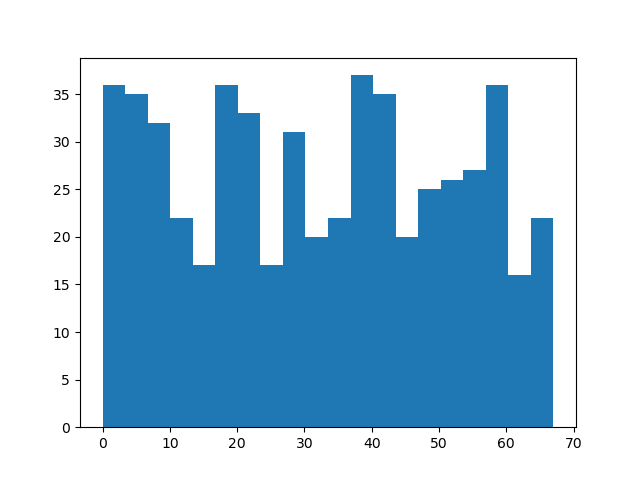

In [53]:
# Analyse size of cluster
unique, counts = np.unique(clust.labels_, return_counts=True)
clust_sz = dict(zip(unique, counts))
del clust_sz[-1]
fig = plt.figure()
mylist = [key for key, val in clust_sz.items() for _ in range(val)]
plt.hist(mylist, bins=20)
# plt.savefig(f'../../latex/figures/cluster_distribution_region')

In [54]:
from collections import Counter
c = Counter(clust_sz)
most_common = c.most_common(5)
idxs = [tuple[0] for tuple in most_common]
print(f'Most common indexes {idxs}')


Most common indexes [39, 21, 42, 4, 43]


In [16]:
Xk = to_plot[:, clust.labels_ == 2]
np.mean(Xk[0, :], axis=0)

array([0.1239445 , 0.20388193], dtype=float32)

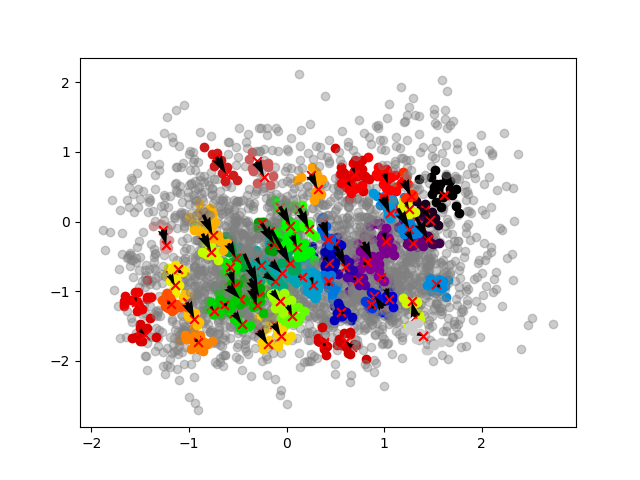

In [55]:
# Plot trajectories clusters
import matplotlib
fig = plt.figure()

to_plot = Xspecies

def get_col():
    x = np.linspace(0.0, 1, len(c))
    cmap = matplotlib.cm.get_cmap('nipy_spectral')
    col = cmap(x)[np.newaxis, :, :3]
    # print(col[0][0])
    return col[0]
    # cmap = cm.get_cmap(plt.get_cmap('cool'))
colors = get_col()

centroid_first = []
for klass in range(-1, len(c)):
    Xk = to_plot[:, clust.labels_ == klass]
    if klass == -1:
        plt.scatter(Xk[0, :, 0], Xk[0, :, 1], alpha=0.4, c='grey')
    else:
        plt.scatter(Xk[0, :, 0], Xk[0, :, 1], alpha=1, color=colors[klass])
        centroid = np.mean(Xk[0, :], axis=0)
        centroid_first.append(centroid)
        plt.scatter(centroid[0], centroid[1], s=40, c='r', marker='x')
centroid_first = np.array(centroid_first)

centroid_last = []
for klass in range(-1, len(c)):
    Xk = to_plot[:, clust.labels_ == klass]
    if klass == -1:
        plt.scatter(Xk[-1, :, 0], Xk[-1, :, 1], alpha=0.4, c='grey')
    else:
        plt.scatter(Xk[-1, :, 0], Xk[-1, :, 1], alpha=1, color=colors[klass])
        centroid = np.mean(Xk[-1, :], axis=0)
        centroid_last.append(centroid)
        plt.scatter(centroid[0], centroid[1], s=40, c='r', marker='x')
centroid_last = np.array(centroid_last)

x1, y1 = centroid_first[:, 0], centroid_first[:, 1]
x2, y2 = centroid_last[:, 0], centroid_last[:, 1]
plt.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1)
# plt.savefig(f'../../latex/figures/latentspace_cluster_region', dpi=600)


In [ ]:
from dataset import InvasiveSpecies
# And this is how you get the names

InvSpec = InvasiveSpecies( '../data/GlobalAlienSpeciesFirstRecordDatabase_v2.xlsx')
InvSpec.filter_data()

In [ ]:
df = InvSpec.df 
family = df[df['TaxonName'] == 'Plum pox virus']['Family'].unique()[0]
print(family)

print(df['LifeForm'].unique()) 

In [ ]:
# Get cluster composition
from dataset import InvasiveSpecies
# And this is how you get the names

from collections import Counter
c = Counter(clust_sz)
most_common = c.most_common(5)
idxs = [tuple[0] for tuple in most_common]
print(f'Most common indexes {idxs}')

for klass in idxs:
    dict = {}

    clusterS = species[clust.labels_ == klass]
    print(f'Taxonomic families for klass {klass} with size {len(clusterS)}')
    for s in clusterS:
        # get taxonomic family of each species
        family = df[df['TaxonName'] == s]['LifeForm'].unique()[0]
        if family in dict.keys():
           dict[family] += 1 
        else:
            dict[family] = 1
    print(f'For cluster {klass}')
    
    for key, el in dict.items():
        print(key, el/len(clusterS))

In [ ]:
# Starting points

import tensorflow as tf
n = 17
time_interval = tf.constant(range(1, n+1), dtype =tf.int32)

n_nodes = 1500
d = 2
X_true = np.zeros((n, n_nodes, d))
for i in range(n_nodes):
  for j in range(d):
    X_true[ :, i, j] = (tf.keras.activations.sigmoid(np.random.uniform(-2, 2, 1)*10*(time_interval/n-np.random.uniform(0.2, 0.8, 1))) -0.5)*np.random.uniform(1, 3, 1) + np.random.uniform(-0.5, 0.5, 1)

